## Imports


In [2]:

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np


## Import all .csv data

In [3]:
autos = pd.read_csv('../Quelldateien/autos_scraped.csv') #csv with scraped EVs from Autolina
autos

,web-scraper-order,web-scraper-start-url,Preis,plz,jahr,ps-stand,Farbe
0,1669622809-189,https://www.autolina.ch/elektro-auto,49'650,8640,NaN,231.0,silber
1,1669622809-190,https://www.autolina.ch/elektro-auto,42'500,6464,2022.0,204.0,weiss
2,1669622809-191,https://www.autolina.ch/elektro-auto,70'200,8807,NaN,325.0,weiss
3,1669622809-192,https://www.autolina.ch/elektro-auto,44'900,1184,2019.0,513.0,weiss
4,1669622809-193,https://www.autolina.ch/elektro-auto,68'990,1920,NaN,408.0,sonstiges
...,...,...,...,...,...,...,...
2309,1669622809-2498,https://www.autolina.ch/elektro-auto,112'790,4310,2022.0,503.0,schwarz
2310,1669622809-2499,https://www.autolina.ch/elektro-auto,45'700,9630,NaN,204.0,blau
2311,1669622809-2500,https://www.autolina.ch/elektro-auto,49'800,3322,2022.0,218.0,blau
2312,1669622809-2501,https://www.autolina.ch/elektro-auto,41'875,8820,NaN,122.0,weiss


In [4]:
ladestellen = pd.read_csv('../Ausgabedateien/locations_Ladestationen.csv') #csv from Ausgabedateien (orig: opendata.swiss)
ladestellen

,Unnamed: 0,Latitude,Longitude,City,Country,PostalCode,Street,OperatorName
0,0,46.813520,9.845910,Davos,CHE,7260,Bahnhofstrasse,Fastned
1,1,46.813500,9.845860,Davos,CHE,7260,Bahnhofstrasse,Fastned
2,2,46.800080,9.831210,Davos,CHE,7270,Talstrasse,Fastned
3,3,46.800130,9.831240,Davos,CHE,7270,Talstrasse,Fastned
4,4,46.799780,9.831040,Davos,CHE,7270,Talstrasse,Fastned
...,...,...,...,...,...,...,...,...
5597,7105,47.380548,8.109115,Suhr,CHE,5034,Rastplatz Suhr A1,eCarUp
5598,7106,47.392556,8.160158,Lenzburg,CHE,5600,Rastplatz Lenzburg A1,eCarUp
5599,7107,47.392556,8.160158,Lenzburg,CHE,5600,Rastplatz Lenzburg A1,eCarUp
5600,7108,47.392556,8.160158,Lenzburg,CHE,5600,Rastplatz Lenzburg A1,eCarUp


In [5]:
dfsolarpotenziale = pd.read_csv('../Quelldateien/solarpotential.csv') # csv from Quelldateien
dfsolarpotenziale

,Unnamed: 0,MunicipalityNumber,MunicipalityName,Canton,Country,Scenario1_RoofsOnly_PotentialSolarElectricity_GWh,Scenario2_RoofsOnly_PotentialSolarElectricity_GWh,Scenario2_RoofsOnly_PotentialSolarHeat_GWh,Scenario3_RoofsFacades_PotentialSolarElectricity_GWh,Scenario4_RoofsFacades_PotentialSolarElectricity_GWh,Scenario4_RoofsFacades_PotentialSolarHeat_GWh,Factsheet,Methodology,PLZ4,%_IN_GDE,KTKZ,GDENR
0,0,1,Aeugst am Albis,Zürich,CH,13.43,8.70,4.72,18.06,13.33,4.72,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,8914.0,100.00,ZH,1.0
1,1,2,Affoltern am Albis,Zürich,CH,50.06,33.83,18.63,69.25,53.02,18.63,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,8909.0,14.34,ZH,2.0
2,3,3,Bonstetten,Zürich,CH,19.66,11.48,8.79,26.72,18.54,8.79,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,8906.0,100.00,ZH,3.0
3,4,4,Hausen am Albis,Zürich,CH,23.67,15.70,8.38,32.61,24.64,8.38,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,6340.0,0.77,ZH,4.0
4,7,5,Hedingen,Zürich,CH,19.14,11.97,7.19,25.68,18.51,7.19,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,8908.0,100.00,ZH,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2140,4768,6806,Vendlincourt,Jura,CH,8.83,6.04,2.35,11.61,8.82,2.35,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,2943.0,100.00,JU,6806.0
2141,4769,6807,Basse-Allaine,Jura,CH,18.64,13.63,4.16,24.70,19.69,4.16,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,2915.0,0.70,JU,6807.0
2142,4773,6808,Clos du Doubs,Jura,CH,21.19,15.39,5.47,27.37,21.57,5.47,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,2882.0,46.03,JU,6808.0
2143,4780,6809,Haute-Ajoie,Jura,CH,26.39,20.84,5.01,33.19,27.64,5.01,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,2906.0,49.43,JU,6809.0


## Dataframes für eine bessere Darstellung formatieren
Auslesen, wie viele Ladestellen pro Gemeinde vorhanden sind. 

In [6]:
dfladestellen = ladestellen.PostalCode.value_counts().reset_index()
dfladestellen.columns = ["plz", "Ladestellen"]
dfladestellen


,plz,Ladestellen
0,6340,97
1,-,71
2,6300,53
3,9015,51
4,6010,49
...,...,...
1012,26316,1
1013,9536,1
1014,6344,1
1015,45739,1


In [7]:
#Für den späteren Merge müssen alle Werte vom Typ int sein. 
dfladestellen = dfladestellen[dfladestellen['plz'].astype(str).str.isdigit()]
dfladestellen

,plz,Ladestellen
0,6340,97
2,6300,53
3,9015,51
4,6010,49
5,4653,48
...,...,...
1012,26316,1
1013,9536,1
1014,6344,1
1015,45739,1


Auslesen, wie viele Elektroautos pro Gemeinde zum Verkauf ausgeschrieben werden

In [8]:
dfauto = autos.plz.value_counts().reset_index()
dfauto.columns = ["plz", "ElektroAutos"]
dfauto

,plz,ElektroAutos
0,9542,99
1,6010,50
2,6340,49
3,9642,43
4,5610,37
...,...,...
415,4450,1
416,8808,1
417,3225,1
418,8887,1


## Verteilung von Elektro-Autos sowie Ladestellen darstellen
Auf dem Graphen ist zu erkennen, dass die Verteilung linksschief ist. Es ist zu erkennen, dass die überwiegende Mehrheit der Gemeinden über sehr wenige oder keine Ladestellen/Elektroautos verfügen. Zudem kann ein Ausreiser (bei 100) beobachtet werden

Text(0, 0.5, 'City \n')

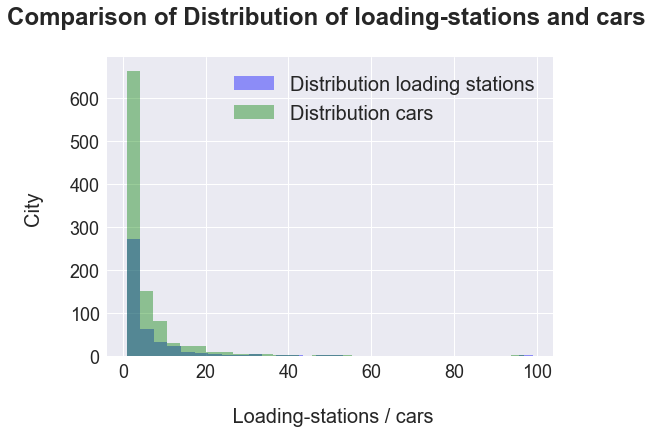

In [9]:
style.use('seaborn')
kwargs = dict(alpha=0.4, bins=30)
plt.hist(dfauto.ElektroAutos, **kwargs, color = 'b', label= 'Distribution loading stations')
plt.hist(dfladestellen.Ladestellen, **kwargs, color = 'g', label = 'Distribution cars')
plt.legend(fontsize = 20)

plt.title('Comparison of Distribution of loading-stations and cars \n', fontweight ="bold", fontsize = 24, fontname = "Arial")
plt.tick_params(labelsize=18)
plt.xlabel("\n Loading-stations / cars", fontsize = 20, fontname = "Arial")
plt.ylabel("City \n", fontsize = 20, fontname = "Arial")


Graph 1.0

##  Categorising and showing loading-stations per City

In [10]:
labels = ['0 - 5','5 - 10', '10 - 20', '20 - 40', '40 - 60', '60 - 100']

dfladestellen["Ladestellen_cat"] = pd.cut(dfladestellen.Ladestellen, bins=[0,5, 10, 20, 40, 60, 100], labels=labels)

dfladestellen

C:\Users\luchu\AppData\Local\Temp\ipykernel_27324\2135381428.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfladestellen["Ladestellen_cat"] = pd.cut(dfladestellen.Ladestellen, bins=[0,5, 10, 20, 40, 60, 100], labels=labels)


,plz,Ladestellen,Ladestellen_cat
0,6340,97,60 - 100
2,6300,53,40 - 60
3,9015,51,40 - 60
4,6010,49,40 - 60
5,4653,48,40 - 60
...,...,...,...
1012,26316,1,0 - 5
1013,9536,1,0 - 5
1014,6344,1,0 - 5
1015,45739,1,0 - 5


In [11]:
#Die einzelnen Kategorien werden zusammengefasst um einen besseren Überblick zu erhalten. 
dfladestellencount = dfladestellen.Ladestellen_cat.value_counts().reset_index()
dfladestellencount.rename(columns = {'index':'labels'}, inplace = True)
dfladestellencount.labels.sort_values()
dfladestellencount


,labels,Ladestellen_cat
0,0 - 5,721
1,5 - 10,173
2,10 - 20,74
3,20 - 40,36
4,40 - 60,6
5,60 - 100,1


Der Untenstehende Graph zeichnet ein ähnliches Bild wie die Verteilung (Graph 1.0). Die meisten Gemeinden verfügen über sehr wenige bis keine Ladestellen. 

Text(0, 0.5, 'City \n')

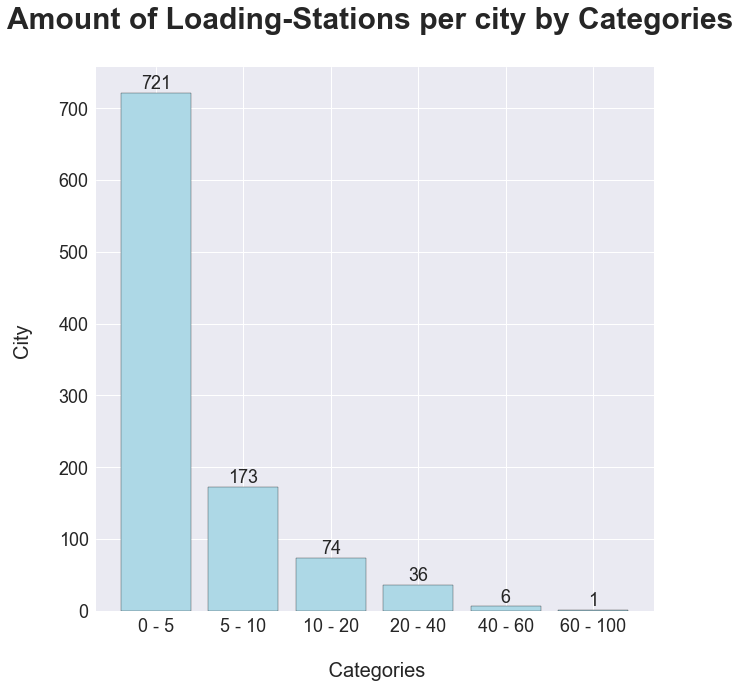

In [12]:
style.use('seaborn')
plt.figure(figsize=(10,10))
barplot = plt.bar(dfladestellencount.labels, dfladestellencount.Ladestellen_cat, fc="lightblue", ec = "black")
plt.title('Amount of Loading-Stations per city by Categories \n', fontweight ="bold", fontsize = 30, fontname = "Arial")
plt.bar_label(barplot, labels=dfladestellencount.Ladestellen_cat, label_type='edge', fontsize = 18)
plt.tick_params(labelsize=18)
plt.xlabel("\n Categories", fontsize = 20)
plt.ylabel("City \n", fontsize = 20)


Graph 2.0

## Zusammenfügen der Dataframes (Ladestellen / Elektroautos)

In [13]:
#Die Dataframes ElektroAutos und Ladestellen werden auf den Key "plz" miteinander gemerget
dfladestellen['plz']=dfladestellen['plz'].astype(int)
dfauto['plz']=dfauto['plz'].astype(dtype = int, errors = 'ignore')
dfmerge = dfauto.merge(dfladestellen, on = 'plz', how = 'outer')
dfmerge = dfmerge.replace(np.NaN, 0)
#dfmerge = dfmerge.fillna(value=0, method=None)
print(dfmerge)

        plz  ElektroAutos  Ladestellen Ladestellen_cat
0      9542          99.0          3.0           0 - 5
1      6010          50.0         49.0         40 - 60
2      6340          49.0         97.0        60 - 100
3      9642          43.0          6.0          5 - 10
4      5610          37.0          7.0          5 - 10
...     ...           ...          ...             ...
1149   1670           0.0          1.0           0 - 5
1150  26316           0.0          1.0           0 - 5
1151   6344           0.0          1.0           0 - 5
1152  45739           0.0          1.0           0 - 5
1153   5304           0.0          1.0           0 - 5

[1154 rows x 4 columns]


C:\Users\luchu\AppData\Local\Temp\ipykernel_27324\3541330668.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfladestellen['plz']=dfladestellen['plz'].astype(int)


Der Datensatz wird mit der Spalte AutosProLadestation angereichert. Diese soll aufzeigen, wie viele Elektroautos pro Ladestation in einier Gemeinede ausgeschrieben sind. Diese neuen Werte helfen dabei die Daten effektiver darstellen zu können. 

In [14]:
for row in dfmerge.iterrows():
    dfmerge['AutosProStation'] = (dfmerge['ElektroAutos'])/(dfmerge['Ladestellen'])
#AutosProStation = Anzahl Elektroautos pro Ladestation

print(dfmerge)


        plz  ElektroAutos  Ladestellen Ladestellen_cat  AutosProStation
0      9542          99.0          3.0           0 - 5        33.000000
1      6010          50.0         49.0         40 - 60         1.020408
2      6340          49.0         97.0        60 - 100         0.505155
3      9642          43.0          6.0          5 - 10         7.166667
4      5610          37.0          7.0          5 - 10         5.285714
...     ...           ...          ...             ...              ...
1149   1670           0.0          1.0           0 - 5         0.000000
1150  26316           0.0          1.0           0 - 5         0.000000
1151   6344           0.0          1.0           0 - 5         0.000000
1152  45739           0.0          1.0           0 - 5         0.000000
1153   5304           0.0          1.0           0 - 5         0.000000

[1154 rows x 5 columns]


In [15]:
labels = ['0','0 - 1', '1 - 2', '2 - 10', '>= 10']
dfmerge["AutosProStation_cattion_cat"] = pd.cut(dfmerge.AutosProStation, bins=[-0.00001, 0, 1, 2, 10, 40], labels=labels)

dfmerge

,plz,ElektroAutos,Ladestellen,Ladestellen_cat,AutosProStation,AutosProStation_cattion_cat
0,9542,99.0,3.0,0 - 5,33.000000,>= 10
1,6010,50.0,49.0,40 - 60,1.020408,1 - 2
2,6340,49.0,97.0,60 - 100,0.505155,0 - 1
3,9642,43.0,6.0,5 - 10,7.166667,2 - 10
4,5610,37.0,7.0,5 - 10,5.285714,2 - 10
...,...,...,...,...,...,...
1149,1670,0.0,1.0,0 - 5,0.000000,0
1150,26316,0.0,1.0,0 - 5,0.000000,0
1151,6344,0.0,1.0,0 - 5,0.000000,0
1152,45739,0.0,1.0,0 - 5,0.000000,0


## Darstellung und  Analyse des Elektroautos pro Ladestation verhältnisses

Der Erste Boxplot zeigt die Verteilung der AutosProStation-Werte mit Ausreiser an. Es ist zu erkennen, dass einige sehr gravierende Ausreiser vorhanden sind. 

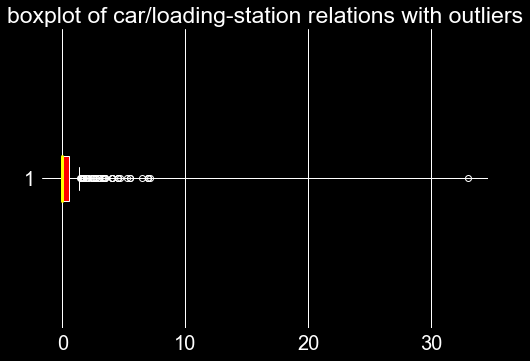

In [49]:
style.use('dark_background')
plt.title('Boxplot of car/loading-station relations with outliers \n', fontsize = 23)
bp = plt.boxplot(dfmerge.AutosProStation, vert=False, patch_artist=True, boxprops=dict(facecolor="red"))
for median in bp['medians']:
    median.set_color('yellow', )
    median.set_linewidth(3)
plt.tick_params(labelsize=20)

Der zweite Boxplot exkludiert die Ausreiser. Es kann beobachtet werden, dass sich der Mittelwert bei 0 befindet. Durch diese beobachtung erkenn wir, dass in einer Gemeinde, welche über Ladestationen verfügt normalerweise keine Elektroautos zum Verkauf angeboten werden.

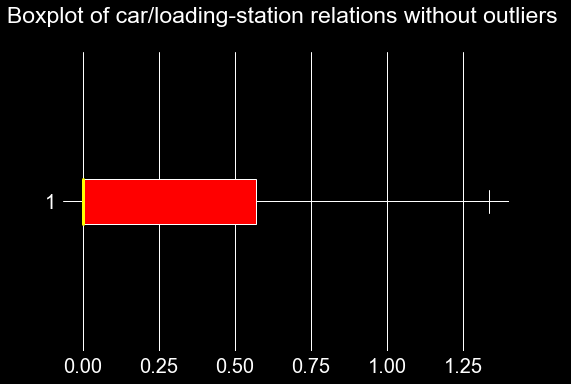

In [52]:
style.use('dark_background')
plt.title('Boxplot of car/loading-station relations without outliers \n', fontsize = 23)
bp = plt.boxplot(dfmerge.AutosProStation, vert=False, showfliers=False, patch_artist=True, boxprops=dict(facecolor="red"))
for median in bp['medians']:
    median.set_color('yellow', )
    median.set_linewidth(3)
plt.tick_params(labelsize=20)

## AutosProStation aufschlüsseln

Die Spalte AutosProStation wird nun aufgeschlüsselt. Gemeinden welche, das selbe Auto / Ladestation Verhältnis aufweisen werden zusammengefasst. Anschliessend werden die Werte (von AutosProStation) kategorisiert

In [18]:
dfcounts = dfmerge.AutosProStation.value_counts().reset_index()
dfcounts

,index,AutosProStation
0,0.000000,734
1,inf,143
2,1.000000,32
3,0.500000,26
4,0.250000,10
...,...,...
108,1.428571,1
109,0.344828,1
110,3.333333,1
111,0.407407,1


In [19]:
#Die Kategorien werden nun Zusammengefasst, damit die Daten besser in einem Barchart dargestellt werden können
dfcounts = dfmerge.AutosProStation_cattion_cat.value_counts().reset_index()
dfcounts.rename(columns = {'index':'labels'}, inplace = True)
dfcounts

,labels,AutosProStation_cattion_cat
0,0,734
1,0 - 1,202
2,1 - 2,38
3,2 - 10,36
4,>= 10,1


Dieser Graph bestätigt die Erkentniss aus dem Boxplot. 734 Gemeinden Verfügen über eine Ladestation ohne dass in dieser Gemeinede ein Elektroauto zum Verkauf ausgeschrieben wird. Lediglich in 27.5% aller Gemeinden mit Ladestationen werden auch Elektroautos angeboten. 

Text(0, 0.5, 'Categories \n')

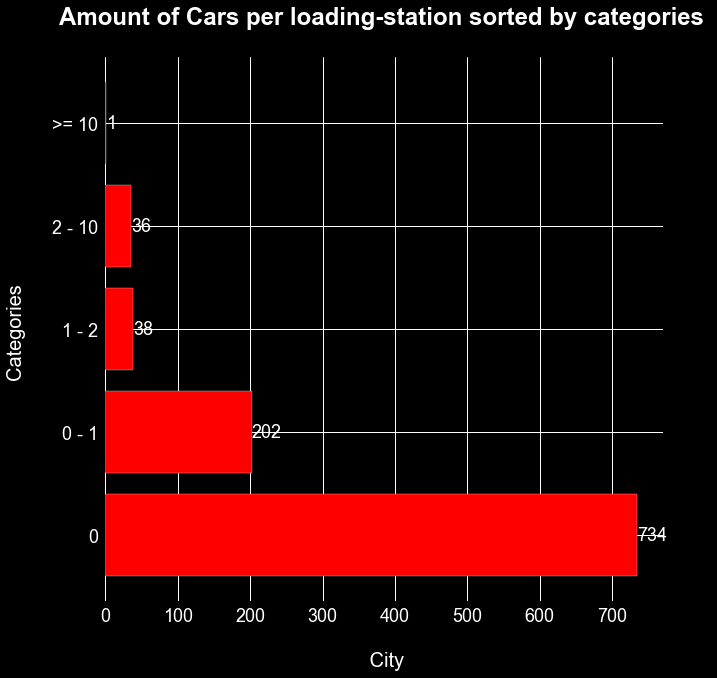

In [54]:
style.use('dark_background')
plt.figure(figsize=(10,10))
barplot = plt.barh(dfcounts.labels, dfcounts.AutosProStation_cattion_cat, fc="red", ec = "white")
plt.bar_label(barplot, labels=dfcounts.AutosProStation_cattion_cat, label_type='edge', fontsize = 18)



plt.title('Amount of Cars per loading-station sorted by categories \n', fontweight ="bold", fontsize = 24, fontname = "Arial")
plt.tick_params(labelsize=18)
plt.xlabel("\n City", fontsize = 20, fontname = "Arial")
plt.ylabel("Categories \n", fontsize = 20, fontname = "Arial")

## Darstellung des Solarpotenzials (Szenario 1)

In [21]:
dfsolarpotenziale

,Unnamed: 0,MunicipalityNumber,MunicipalityName,Canton,Country,Scenario1_RoofsOnly_PotentialSolarElectricity_GWh,Scenario2_RoofsOnly_PotentialSolarElectricity_GWh,Scenario2_RoofsOnly_PotentialSolarHeat_GWh,Scenario3_RoofsFacades_PotentialSolarElectricity_GWh,Scenario4_RoofsFacades_PotentialSolarElectricity_GWh,Scenario4_RoofsFacades_PotentialSolarHeat_GWh,Factsheet,Methodology,PLZ4,%_IN_GDE,KTKZ,GDENR
0,0,1,Aeugst am Albis,Zürich,CH,13.43,8.70,4.72,18.06,13.33,4.72,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,8914.0,100.00,ZH,1.0
1,1,2,Affoltern am Albis,Zürich,CH,50.06,33.83,18.63,69.25,53.02,18.63,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,8909.0,14.34,ZH,2.0
2,3,3,Bonstetten,Zürich,CH,19.66,11.48,8.79,26.72,18.54,8.79,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,8906.0,100.00,ZH,3.0
3,4,4,Hausen am Albis,Zürich,CH,23.67,15.70,8.38,32.61,24.64,8.38,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,6340.0,0.77,ZH,4.0
4,7,5,Hedingen,Zürich,CH,19.14,11.97,7.19,25.68,18.51,7.19,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,8908.0,100.00,ZH,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2140,4768,6806,Vendlincourt,Jura,CH,8.83,6.04,2.35,11.61,8.82,2.35,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,2943.0,100.00,JU,6806.0
2141,4769,6807,Basse-Allaine,Jura,CH,18.64,13.63,4.16,24.70,19.69,4.16,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,2915.0,0.70,JU,6807.0
2142,4773,6808,Clos du Doubs,Jura,CH,21.19,15.39,5.47,27.37,21.57,5.47,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,2882.0,46.03,JU,6808.0
2143,4780,6809,Haute-Ajoie,Jura,CH,26.39,20.84,5.01,33.19,27.64,5.01,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,2906.0,49.43,JU,6809.0


Der Erste Boxplot visualisiert die GWH-Potenziale des 1. Seznarios. Auch hier ist zu erkennen, dass einige starke Ausreiser bestehen. 

Text(0.5, 0, '\n GWH')

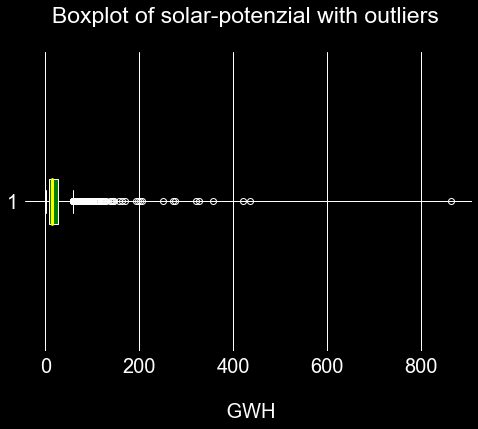

In [71]:
style.use('dark_background')
bp1 = plt.boxplot(dfsolarpotenziale.Scenario1_RoofsOnly_PotentialSolarElectricity_GWh, vert=False, patch_artist=True, boxprops=dict(facecolor="green") )

for median in bp1['medians']:
    median.set_color('yellow', )
    median.set_linewidth(3)
plt.tick_params(labelsize=20)

plt.title('Boxplot of solar-potenzial with outliers \n', fontsize = 23)
plt.xlabel("\n GWH", fontsize = 20, fontname = "Arial")

Im zweiten Boxplot (Ausreiser werden exkludiert) ist zu erkennen, dass der Median bei ca. 15 liegt. 

Text(0.5, 0, '\n GWH')

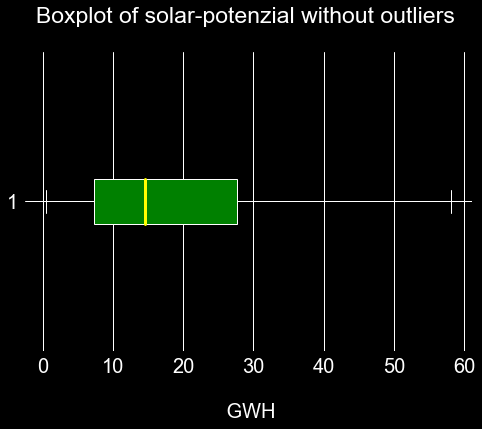

In [72]:
style.use('dark_background')
bp2 = plt.boxplot(dfsolarpotenziale.Scenario1_RoofsOnly_PotentialSolarElectricity_GWh, vert=False, showfliers=False, patch_artist=True, boxprops=dict(facecolor="green"))

for median in bp2['medians']:
    median.set_color('yellow', )
    median.set_linewidth(3)
plt.tick_params(labelsize=20)

plt.title('Boxplot of solar-potenzial without outliers \n', fontsize = 23)
plt.xlabel("\n GWH", fontsize = 20, fontname = "Arial")

Um die genauen Zahlen auslesen zu können, können wir den Datafram mit der describe funktion untersuchen (Scenario1_RoofsOnly_PotentialSolarElectricity_GWh = relevante Spalte). Wie im Boxplot beobachtet, liegt der Median bei ca. 15 (genau 14.51). Zusätzlich kann der Mittelwert Ausgelesen werden. Dieser liegt mit 23.304 weit über dem Median. Diese kennzahl muss aber vorsichtig betrachtet werden, da Sie nicht robust ist und in diesem Beispiel starke ausreiser vorhanden sind (Dies kann im ersten Boxplot beobachtet werden)

In [24]:
dfsolarpotenziale.describe()

,Unnamed: 0,MunicipalityNumber,Scenario1_RoofsOnly_PotentialSolarElectricity_GWh,Scenario2_RoofsOnly_PotentialSolarElectricity_GWh,Scenario2_RoofsOnly_PotentialSolarHeat_GWh,Scenario3_RoofsFacades_PotentialSolarElectricity_GWh,Scenario4_RoofsFacades_PotentialSolarElectricity_GWh,Scenario4_RoofsFacades_PotentialSolarHeat_GWh,PLZ4,%_IN_GDE,GDENR
count,2145.000000,2145.000000,2145.000000,2145.000000,2145.000000,2145.000000,2145.000000,2145.000000,2122.000000,2122.000000,2122.000000
mean,2480.464802,3289.818182,23.304284,15.957524,7.834154,31.187944,23.841184,7.834154,4677.264373,66.768115,3283.875589
std,1406.175878,2133.934762,35.084104,23.783293,14.397741,48.158664,36.719078,14.397741,2606.022232,42.992754,2136.016024
min,0.000000,1.000000,0.400000,0.240000,0.120000,0.560000,0.400000,0.120000,1000.000000,0.010000,1.000000
25%,1291.000000,1067.000000,7.340000,4.830000,2.210000,9.660000,7.320000,2.210000,2319.000000,10.797500,1064.250000
50%,2499.000000,3296.000000,14.510000,9.630000,4.590000,19.400000,14.580000,4.590000,4416.000000,99.780000,3293.500000
75%,3793.000000,5411.000000,27.710000,18.800000,9.200000,37.130000,27.940000,9.200000,6820.500000,100.000000,5410.750000
max,4784.000000,6810.000000,865.540000,512.110000,440.760000,1215.290000,861.860000,440.760000,9633.000000,100.000000,6810.000000


## Zusammenfügen der Dataframes (Solarpotenziale / Ladestellen)

In [25]:
#dfsolarpotenziale für den merge vorbereiten:
dfsolarpotenziale.rename(columns = {'PLZ4':'plz'}, inplace = True)
dfsolarpotenzilae = dfsolarpotenziale['plz'].drop_duplicates(keep='first', inplace=False)

In [26]:
#Die Dataframes dfsolarpotenziale und Ladestellen werden auf den Key "plz" miteinander gemerget
dfladestellen['plz']=dfladestellen['plz'].astype(int)
dfsolarpotenziale['plz']=dfsolarpotenziale['plz'].astype(dtype = int, errors = 'ignore')
dfmergesolar = dfsolarpotenziale.merge(dfladestellen, on = 'plz', how = 'outer')
dfmergesolar = dfmergesolar.replace(np.NaN, 0)

#Dataframe nach GWH sortieren (Scenario1_RoofsOnly_PotentialSolarElectricity_GWh)
dfmergesolar = dfmergesolar.sort_values(by = ["Scenario1_RoofsOnly_PotentialSolarElectricity_GWh"], axis = 0, ascending=True)
dfmergesolar.reset_index(inplace = True, drop = True)

C:\Users\luchu\AppData\Local\Temp\ipykernel_27324\3575289234.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfladestellen['plz']=dfladestellen['plz'].astype(int)


In [27]:
dfmergesolar

,Unnamed: 0,MunicipalityNumber,MunicipalityName,Canton,Country,Scenario1_RoofsOnly_PotentialSolarElectricity_GWh,Scenario2_RoofsOnly_PotentialSolarElectricity_GWh,Scenario2_RoofsOnly_PotentialSolarHeat_GWh,Scenario3_RoofsFacades_PotentialSolarElectricity_GWh,Scenario4_RoofsFacades_PotentialSolarElectricity_GWh,Scenario4_RoofsFacades_PotentialSolarHeat_GWh,Factsheet,Methodology,plz,%_IN_GDE,KTKZ,GDENR,Ladestellen,Ladestellen_cat
0,0.0,0.0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0,0,45739.0,0.00,0,0.0,1.0,0 - 5
1,0.0,0.0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0,0,26434.0,0.00,0,0.0,4.0,0 - 5
2,0.0,0.0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0,0,8833.0,0.00,0,0.0,4.0,0 - 5
3,0.0,0.0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0,0,25364.0,0.00,0,0.0,4.0,0 - 5
4,0.0,0.0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0,0,3097.0,0.00,0,0.0,4.0,0 - 5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2644,3922.0,5586.0,Lausanne,Vaud,CH,326.86,234.42,125.12,461.19,368.75,125.12,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,1000.0,7.03,VD,5586.0,0.0,NaN
2645,251.0,230.0,Winterthur,Zürich,CH,356.40,227.59,148.21,485.22,356.41,148.21,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,8310.0,0.11,ZH,230.0,15.0,10 - 20
2646,2066.0,2701.0,Basel,Basel-Stadt,CH,421.63,286.02,170.56,562.46,426.85,170.56,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,4001.0,0.82,BS,2701.0,0.0,NaN
2647,413.0,351.0,Bern,Bern,CH,436.35,333.61,131.30,592.33,489.59,131.30,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,3004.0,3.14,BE,351.0,4.0,0 - 5


Um einen passendne Vergleich aufstellen zu können müssen wir zudem wissen, wie viel GWH eine Ladestation im Schnitt im Jahr verbraucht. Es wird davon ausgegangen, dass eine durchschnittliche Ladestation 16.66 KWH pro Stunde verbraucht. Somit würde sich der durchschnittliche Verbrauch von Ladestationen im Jahr auf ca. 146'000 KWH belaufen. Dies entspricht 0.146 GWH

(Quelle = https://www.energieheld.ch/elektromobilitaet/stromtankstellen)


In [28]:
#Es wird eine neue Spalte erstellt um zu berechnen, wie gross der Verbrauch der Ladestationen in GWH ist 
for row in dfmergesolar.iterrows():
    dfmergesolar['Ladestellen_GWH'] = (dfmergesolar['Ladestellen'])*0.146
dfmergesolar

,Unnamed: 0,MunicipalityNumber,MunicipalityName,Canton,Country,Scenario1_RoofsOnly_PotentialSolarElectricity_GWh,Scenario2_RoofsOnly_PotentialSolarElectricity_GWh,Scenario2_RoofsOnly_PotentialSolarHeat_GWh,Scenario3_RoofsFacades_PotentialSolarElectricity_GWh,Scenario4_RoofsFacades_PotentialSolarElectricity_GWh,Scenario4_RoofsFacades_PotentialSolarHeat_GWh,Factsheet,Methodology,plz,%_IN_GDE,KTKZ,GDENR,Ladestellen,Ladestellen_cat,Ladestellen_GWH
0,0.0,0.0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0,0,45739.0,0.00,0,0.0,1.0,0 - 5,0.146
1,0.0,0.0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0,0,26434.0,0.00,0,0.0,4.0,0 - 5,0.584
2,0.0,0.0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0,0,8833.0,0.00,0,0.0,4.0,0 - 5,0.584
3,0.0,0.0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0,0,25364.0,0.00,0,0.0,4.0,0 - 5,0.584
4,0.0,0.0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0,0,3097.0,0.00,0,0.0,4.0,0 - 5,0.584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2644,3922.0,5586.0,Lausanne,Vaud,CH,326.86,234.42,125.12,461.19,368.75,125.12,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,1000.0,7.03,VD,5586.0,0.0,NaN,0.000
2645,251.0,230.0,Winterthur,Zürich,CH,356.40,227.59,148.21,485.22,356.41,148.21,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,8310.0,0.11,ZH,230.0,15.0,10 - 20,2.190
2646,2066.0,2701.0,Basel,Basel-Stadt,CH,421.63,286.02,170.56,562.46,426.85,170.56,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,4001.0,0.82,BS,2701.0,0.0,NaN,0.000
2647,413.0,351.0,Bern,Bern,CH,436.35,333.61,131.30,592.33,489.59,131.30,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,3004.0,3.14,BE,351.0,4.0,0 - 5,0.584


Es zeichnet sich auf diesem Graphen ab, dass das Solarstrompotenzial zumindest in der Hälfte der Gemeinden höher ist als der Stromverbrauch für die Jeweiligen Ladestationen. Aufgrund der drastischen Ausreiser, können aber noch keine klaren Schlüsse gezogen werden.  

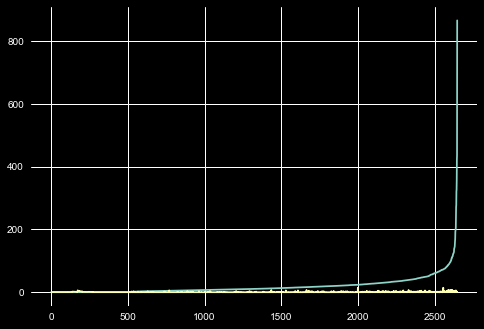

In [29]:
plt.plot(dfmergesolar.Scenario1_RoofsOnly_PotentialSolarElectricity_GWh, )
plt.plot(dfmergesolar.Ladestellen_GWH)



In [30]:
#um einen genaueren Graphen zu erstellen, muss der Schwellenwert ausgelesen werden, ab wann ein Wert als Ausreisser gilt. 
#hierfür wird die .quantile funktion Verwendet. Somit können wir auslesen, wo das 100% Quantil liegt, alles was darüber liegt ist ein Ausreisser. 
dfmergesolar["Scenario1_RoofsOnly_PotentialSolarElectricity_GWh"].quantile(0.01)
size = dfmergesolar["Scenario1_RoofsOnly_PotentialSolarElectricity_GWh"].quantile(0.99)
print(size)

121.20839999999998


In [31]:
#Der Dataframe muss nun so gefiltert werden, dass keine Ausreiser mehr vorhanden sind
dfmergesolar_filterd = dfmergesolar[dfmergesolar['Scenario1_RoofsOnly_PotentialSolarElectricity_GWh'] < size]

Auf dem Untenstehdnen Graphen ist zu erkenne, welche Ladestationen Ihren Bedarf mit dem Solarstrompotenzial decken könnten. Die Gelbe Linie stellt das Solarstrompotenzial dar. Die Blaue Linie veranschaulicht den Jährlicher Verbrauch aller Ladestationen pro gemeinde. Es ist zu erkennen, dass ca. 2000 Gemeinden den Jährlichen Elektroladestellenverbrauch mit ihrem Solarstrompotenzial decken können. 

Text(0, 0.5, 'GigawattStunden')

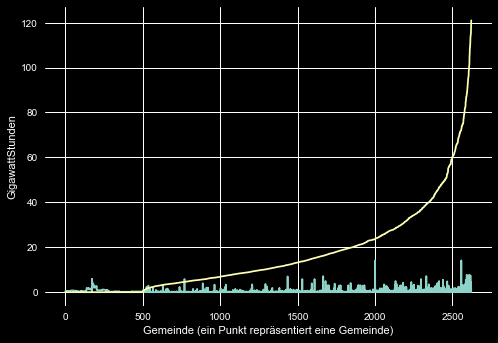

In [32]:
plt.plot(dfmergesolar_filterd.Ladestellen_GWH)
plt.plot(dfmergesolar_filterd.Scenario1_RoofsOnly_PotentialSolarElectricity_GWh, )
plt.xlabel('Gemeinde (ein Punkt repräsentiert eine Gemeinde)')
plt.ylabel('GigawattStunden')
